copy from https://blog.naver.com/ckdgus1433/221443838135

# Autoencoder 기초

## 모듈 임포팅

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

## 데이터 로딩

In [2]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Normalization

In [3]:
# 데이터 정규화
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


## Flattening

In [4]:
x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))


## 영상 보기

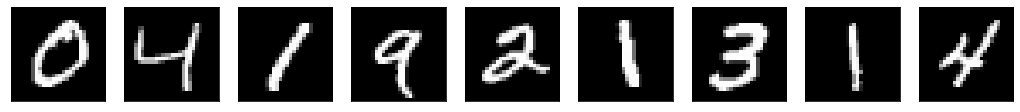

In [5]:
# Noise가 추가된 데이터 확인
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 모델 정의와 학습 실행

In [ ]:
# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')


# 모형 학습
model.fit(x_train, x_train, epochs=100, batch_size=256)


## 결과 확인

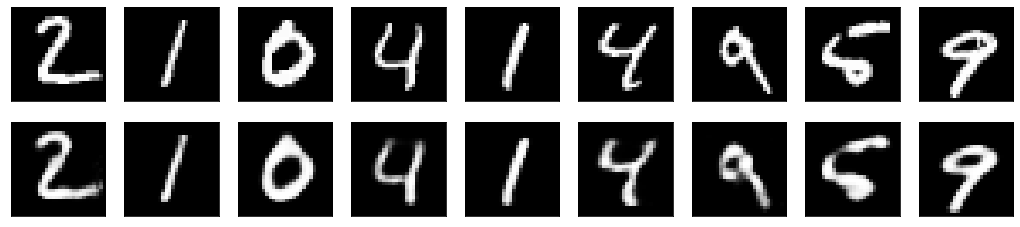

In [7]:
reconstruted = model.predict(x_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # 출력된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(reconstruted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

# Denoising Autoencoder 기초

## 모듈+로딩+Normalization

In [8]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 784))
x_test = np.reshape(x_test, (len(x_test), 784))

## 노이즈 추가

In [9]:
noise = np.random.normal(loc=0.0, scale=1.0, size=10000)

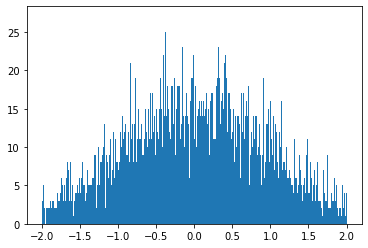

In [11]:
plt.hist(noise, bins=1000, range=(-2, 2))
plt.show()

In [13]:
# 원본데이터에 Noise 추가
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# 최대가 1, 최소가 0이 되도록 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## 노이즈 추가된 영상 보기

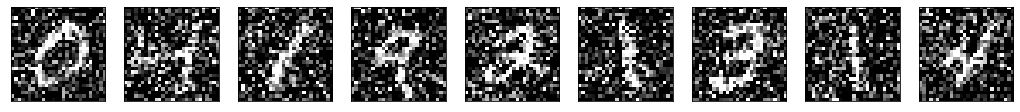

In [15]:
# Noise가 추가된 데이터 확인
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_train_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 모델 정의와 학습 실행

In [ ]:
# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

# 모형 학습
model.fit(x_train_noisy, x_train, epochs=100, batch_size=256, validation_split=0.1, shuffle=True)


## 결과 확인

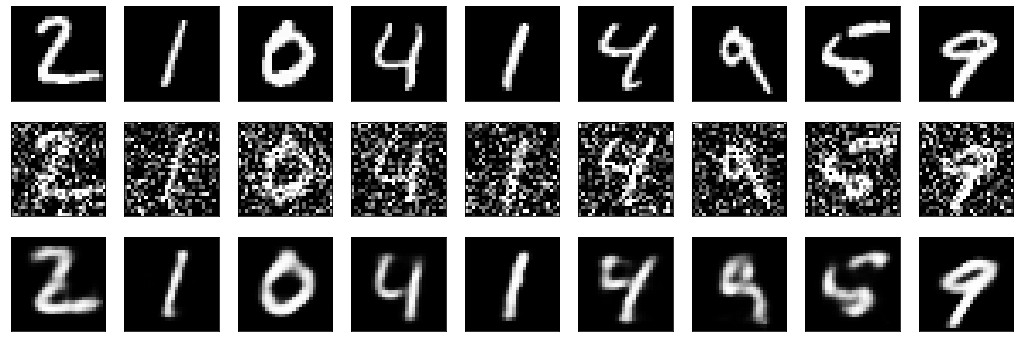

In [19]:
decoded_imgs = model. predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 첨가 된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 제거 된 것
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Super resolution 기초

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [21]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(x_train, _), (x_test, _) = mnist.load_data()

In [22]:
# 데이터 정규화 및 Reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [23]:
# 해상도 낮추기
def shrink(data, rows, cols):
    return data.reshape(data.shape[0], rows, int(data.shape[1]/rows), cols, int(data.shape[2]/cols)).sum(axis=2).sum(axis=3)

reduced_x_train = shrink(x_train, 14, 14)
reduced_x_test = shrink(x_test, 14, 14)
print(reduced_x_train.shape)
print(reduced_x_test.shape)

(60000, 14, 14)
(10000, 14, 14)


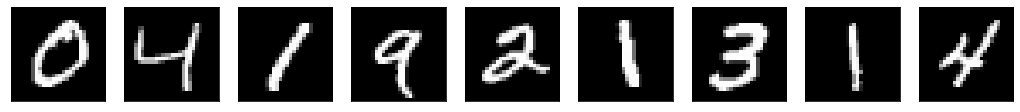

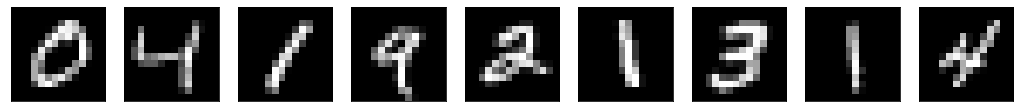

In [24]:
n = 10

plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 해상도 낮아진 이미지 확인
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(reduced_x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [25]:
# train, test set 나누기
reduced_x_train = reduced_x_train.reshape(reduced_x_train.shape[0], 14*14)
reduced_x_test = reduced_x_test.reshape(reduced_x_test.shape[0], 14*14)
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

In [26]:
print(reduced_x_train.shape)
print(x_train.shape)
print(reduced_x_test.shape)
print(x_test.shape)

(60000, 196)
(60000, 784)
(10000, 196)
(10000, 784)


## 모델 정의와 학습

In [ ]:
# 모델 정의
model = Sequential()

model.add(Dense(128, activation='relu', input_dim=14*14))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

model.compile(optimizer='adam', loss='mse')

# 모델 학습
model.fit(reduced_x_train, x_train, epochs=50, batch_size=256, validation_split=0.1)

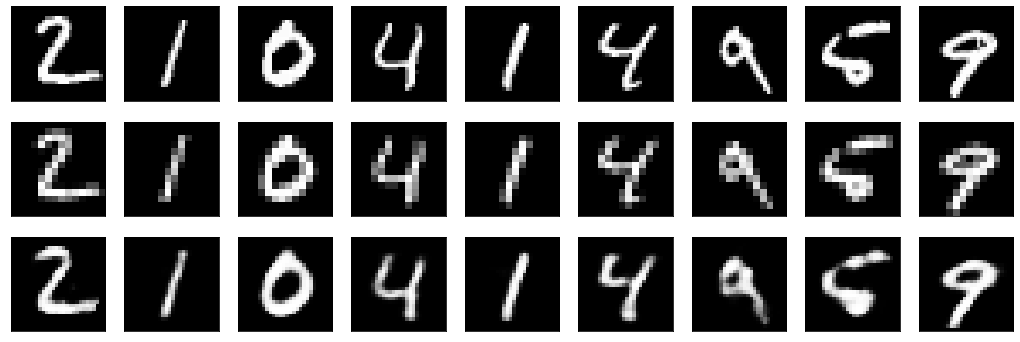

In [28]:
# 결과 확인
super_resolutioned = model.predict(reduced_x_test)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n):
    # display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reduced
    ax = plt.subplot(3, n, i + n)
    plt.imshow(reduced_x_test[i].reshape(14,14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display super resolution
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(super_resolutioned[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()